In [1]:
class_label = ['sayurLabuSiam', 'buahAnggur', 'daunParsley', 'buahSalak', 'labuWaluhKuning', 'sayurJagungMuda', 'buahJeruk', 'buahNanas', 'bayamHijau', 'sayurKecipir', 'buahJerukBali', 'sayurKolMerah', 'buahMatoa', 'sayurKolPutih', 'buahSrikaya', 'bayamMerah', 'buahKesemek', 'buahDurian', 'buahManggis', 'petai', 'sayurSeladaAir', 'jamurKuping', 'buahSukun', 'buahJambuAir', 'buahJambuBiji', 'buahBelimbing', 'buahKelapa', 'rumputLaut', 'sayurPepayaMuda', 'melinjo', 'buahLemon', 'buahMarkisa', 'sayurSawiPutih', 'buahRambutan', 'sayurGenjer', 'buahKedondong', 'buahAlpukat', 'buahKelengkeng', 'buahMengkudu', 'taoge', 'sayurPakis', 'buahDuku', 'kacangMekah', 'sayurNangkaMuda', 'buahApel', 'timun', 'wortel', 'rebung', 'sayurTerongBelanda', 'daunTalas', 'buahPala', 'daunKucai', 'buahNaga', 'buahPepaya', 'jengkol', 'kecombrang', 'daunPepaya', 'sayurBuncis', 'sayurJantungPisang', 'sayurTerong', 'buahMangga', 'buahSawo', 'buahJerukNipis', 'jamurTiram', 'daunKubis', 'buahPisang', 'buahSirsak', 'sayurKangkung', 'daunSeledri', 'daunMelinjo', 'sayurSelada', 'buahNangka', 'tomatMerah', 'buahMelon', 'tomatMuda', 'sayurSawiHijau', 'buahSemangka', 'sayurKacangPanjang']

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
from IPython.display import clear_output as cls

In [3]:
# get the model
tflite_model_path = '/content/drive/MyDrive/Capstone/model[-1,1]/MobNetV3L_1.tflite'

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


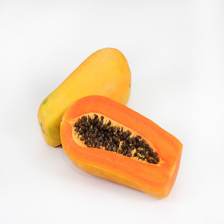

In [8]:
# Ubah path ke lokasi gambar Anda
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Capstone/pepaya.jpg'
# image_path = '/content/tomat.jfif'

# Load image
img = Image.open(image_path)

# Resize image to (224, 224)
img = img.resize((224, 224))

# Convert image to numpy array
img_array = np.array(img)

# Expand dims to match the model's input shape (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)
# img_array = cast(expand_dims(img_array, axis=0), float32)
# img_array = preprocess_input(img_array)
# Normalize image data if required by the model (assuming the model requires normalization)
img_array = img_array.astype('float32')
img

In [9]:
# Set the value of the input tensor
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run the model
interpreter.invoke()

# Get the results
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model Output:", class_label[np.argmax(output_data, axis=1)[0]])


Model Output: buahPepaya
